## **Load Dataset**

In [59]:
import numpy as np
import pandas as pd
import sklearn
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
from sklearn.datasets import load_iris

dataset = load_iris()

In [61]:
X = dataset["data"]
y = dataset["target"]

In [62]:
data = dataset["data"]

In [63]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [64]:
data.shape

(150, 4)

In [65]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [66]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## **Get Experiment from MLFlow**

In [68]:
import mlflow

EXPERIMENT_NAME = "iris_project"  # change this to your experiment name

# Get the experiment
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

# Print the experiment details
print(f"Name: {experiment.name}")
print(f"Experiment_id: {experiment.experiment_id}")
print(f"Artifact Location: {experiment.artifact_location}")
print(f"Tags: {experiment.tags}")
print(f"Lifecycle_stage: {experiment.lifecycle_stage}")

Name: iris_project
Experiment_id: 540587213202298261
Artifact Location: mlflow-artifacts:/540587213202298261
Tags: {}
Lifecycle_stage: active


## **Separate Features (X) and Labels (y)**

In [69]:
from sklearn.model_selection import train_test_split

SEED_VALUE = 43
TRAIN_SPLIT = 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = TRAIN_SPLIT, random_state = SEED_VALUE)

In [70]:
# Verificar las dimensiones
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


## **Train Model**

In [71]:
from sklearn.tree import DecisionTreeClassifier

CRITERION = 'gini'
MAX_DEPTH = 3

model = DecisionTreeClassifier(criterion = CRITERION , max_depth = MAX_DEPTH, random_state = SEED_VALUE)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=43)

## **Evaluate the model**

In [72]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print(f"Seed {SEED_VALUE}")
print(f"Accuracy: {accuracy}")
print(f"Precision {precision}")
print(f"Recall: {recall}")

Seed 43
Accuracy: 0.8666666666666667
Precision 0.8771428571428572
Recall: 0.8666666666666667


PermissionError: [Errno 13] Permission denied: '/confusion_matrix.png'

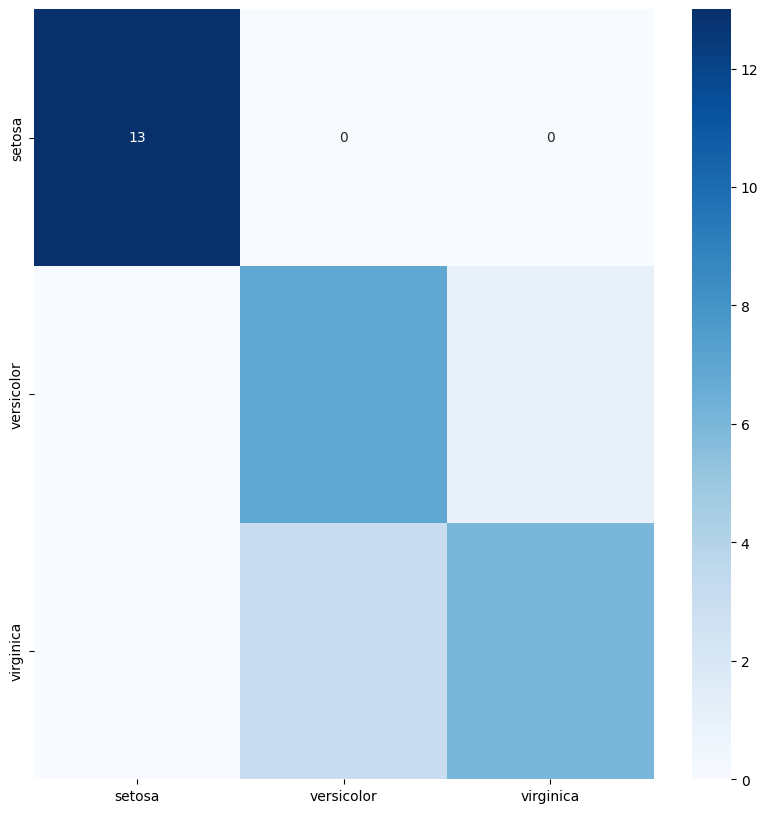

In [74]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (10,10)) 

sns.heatmap(conf, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = dataset.target_names, yticklabels = dataset.target_names)

fig_save_path = "confusion_matrix.png"

plt.savefig(fig_save_path)

PermissionError: [Errno 13] Permission denied: '/decision_tree.png'

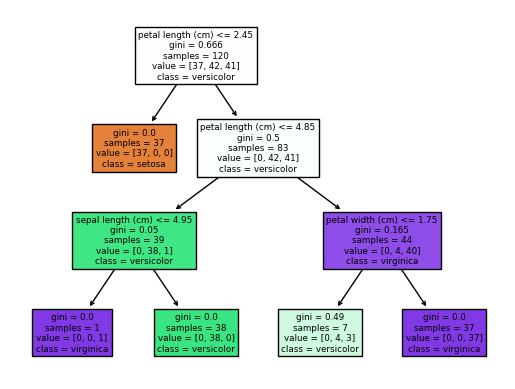

In [ ]:
from sklearn import tree

fig_path = "decision_tree.png"

tree.plot_tree(model, feature_names = dataset.feature_names, class_names = dataset.target_names, filled = True)

plt.savefig(fig_path)

## **Log Metrics to MLFlow**

In [ ]:
import mlflow

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "my-run-name"

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

In [ ]:
import mlflow

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "my-run-name"

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

#experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

experiment_id = "540587213202298261"


In [ ]:
import mlflow

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "set-tags"


experiment_id = "540587213202298261"


with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME,) as run:
  
    # set the tags
    mlflow.set_tags({"default_model_params": False})

In [ ]:
import mlflow

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "set-params"

experiment_id = "540587213202298261"

with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME,) as run:
  
    # set the tags
    mlflow.set_tags({"default_model_params": False})

    
    # Log a parameter (key-value pair)
    # Log the model parameters

    mlflow.log_param("random_seed", SEED_VALUE)
    mlflow.log_param("train_size", TRAIN_SPLIT)
    mlflow.log_param("criterion", CRITERION)
    mlflow.log_param("max_depth", MAX_DEPTH)

In [ ]:
import mlflow

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "set-metrics"

experiment_id = "540587213202298261"

with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME,) as run:
  
    # set the tags
    mlflow.set_tags({"default_model_params": False})

    
    # Log a parameter (key-value pair)
    # Log the model parameters

    mlflow.log_param("random_seed", SEED_VALUE)
    mlflow.log_param("train_size", TRAIN_SPLIT)
    mlflow.log_param("criterion", CRITERION)
    mlflow.log_param("max_depth", MAX_DEPTH)

    # Log a metric; metrics can be updated throughout the run
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)

In [ ]:
import mlflow

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "set-model"

experiment_id = "540587213202298261"

with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME,) as run:
  
    # set the tags
    mlflow.set_tags({"default_model_params": False})

    
    # Log a parameter (key-value pair)
    # Log the model parameters

    mlflow.log_param("random_seed", SEED_VALUE)
    mlflow.log_param("train_size", TRAIN_SPLIT)
    mlflow.log_param("criterion", CRITERION)
    mlflow.log_param("max_depth", MAX_DEPTH)


    # Log a metric; metrics can be updated throughout the run
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)


    # Log the model as an artifact
    mlflow.sklearn.log_model(model,"model")


In [ ]:
import mlflow

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "set-artif"

experiment_id = "540587213202298261"

with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME,) as run:
  
    # set the tags
    mlflow.set_tags({"default_model_params": False})

    
    # Log a parameter (key-value pair)
    # Log the model parameters

    mlflow.log_param("random_seed", SEED_VALUE)
    mlflow.log_param("train_size", TRAIN_SPLIT)
    mlflow.log_param("criterion", CRITERION)
    mlflow.log_param("max_depth", MAX_DEPTH)


    # Log a metric; metrics can be updated throughout the run
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)


    # Log the confusion matrix and decision tree as an artifact
    mlflow.log_artifact(fig_save_path)
    mlflow.log_artifact(fig_path)

    # Log the model as an artifact
    mlflow.sklearn.log_model(model,"model")


In [ ]:
from sklearn.tree import DecisionTreeClassifier

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "my-run-name"

experiment_id = "540587213202298261"

CRITERION = 'gini'
MAX_DEPTH = 3

for seed in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = TRAIN_SPLIT, random_state = seed)
    
    # Create a DecisionTree

    model = DecisionTreeClassifier(criterion = CRITERION , max_depth = MAX_DEPTH, random_state = SEED_VALUE)
    model.fit(X_train, y_train)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')    
    conf = confusion_matrix(y_test, y_pred)

    # Create artifacts

    fig_save_path = "confusion_matrix.png"
    fig, ax = plt.subplots(figsize = (10,10)) 
    sns.heatmap(conf, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = dataset.target_names, yticklabels = dataset.target_names)
    plt.savefig(fig_save_path)

    fig_path = "decision_tree.png"
    tree.plot_tree(model, feature_names = dataset.feature_names, class_names = dataset.target_names, filled = True)
    plt.savefig(fig_path)
  
    # Guardar métricas

    run_name = f"seed-{seed}

    import mlflow

    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name,) as run:
  
    # set the tags
    mlflow.set_tags({"default_model_params": False})

    
    # Log a parameter (key-value pair)
    # Log the model parameters

    mlflow.log_param("random_seed", seed)
    mlflow.log_param("train_size", TRAIN_SPLIT)
    mlflow.log_param("criterion", CRITERION)
    mlflow.log_param("max_depth", MAX_DEPTH)


    # Log a metric; metrics can be updated throughout the run
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)


    # Log the confusion matrix as an artifact
    mlflow.log_artifact(fig_save_path)
    mlflow.log_artifact(fig_path)

    # Log the model as an artifact
    mlflow.sklearn.log_model(model,"model")


In [77]:
from sklearn.tree import DecisionTreeClassifier

EXPERIMENT_NAME = "iris-project"  
RUN_NAME = "seeds"

experiment_id = "540587213202298261"

CRITERION = 'gini'
MAX_DEPTH = 3

for seed in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = TRAIN_SPLIT, random_state = seed)
    
    # Create a DecisionTree

    model = DecisionTreeClassifier(criterion = CRITERION , max_depth = MAX_DEPTH, random_state = SEED_VALUE)
    model.fit(X_train, y_train)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')    
    conf = confusion_matrix(y_test, y_pred)


    # Guardar métricas

    run_name = f"seed-{seed}"


    import mlflow

    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
  
       # set the tags
       mlflow.set_tags({"default_model_params": False})

    
       # Log a parameter (key-value pair)
       # Log the model parameters

       mlflow.log_param("random_seed", seed)
       mlflow.log_param("train_size", TRAIN_SPLIT)
       mlflow.log_param("criterion", CRITERION)
       mlflow.log_param("max_depth", MAX_DEPTH)


       # Log a metric; metrics can be updated throughout the run
       mlflow.log_metric("accuracy", accuracy)
       mlflow.log_metric("precision", precision)
       mlflow.log_metric("recall", recall)


       # Log the model as an artifact
       mlflow.sklearn.log_model(model,"model")

/home/vscode/.pyenv/versions/3.11.5/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/vscode/.pyenv/versions/3.11.5/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/home/vscode/.pyenv/versions/3.11.5/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To a